# BoxOfficeMojo Python WebScraper

In [627]:
from IPython.display import Image

from bs4 import BeautifulSoup

import requests

import pandas as pd

# import warnings
# warnings.filterwarnings('ignore')

Testing with Scream page on BoxOfficeMojo.com

I have identified the fields that I want to scrape:

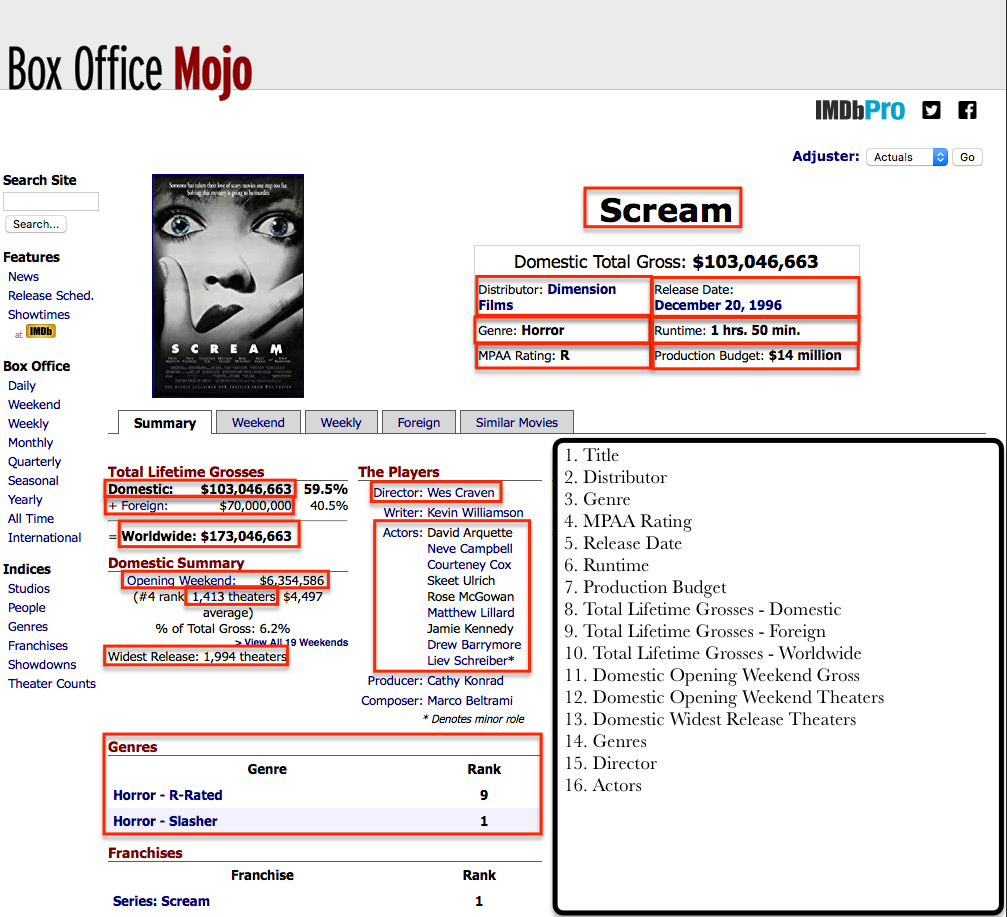

In [628]:
PATH = "/Users/Love/Documents/Projects/BoxOfficeMojo-Python-WebScraper/ProjectSetup-JupyterNotebookTesting/"
Image(filename = PATH + "BoxOfficeMojoFieldsListed.png", width=800, height=800)

Ideal output would be these fields in a DataFrame, in the given order, as well a csv file for  backup.

Pull URL request from the above page:

In [629]:
page = requests.get('https://www.boxofficemojo.com/movies/?id=leap.htm')
# page = requests.get('https://www.boxofficemojo.com/movies/?id=girldragontattoo11.htm')
# ^ The Girl with the Dragon Tattoo secondary test case to ensure html parsing is consistent

In [630]:
soup = BeautifulSoup(page.content, 'lxml')

Move to Body of the html as a checkpoint:

In [631]:
body = soup.find('div', id='body')

Move to table containing the film title. Identified by the style of the table:

In [632]:
upper_table = body.find('table', style='padding-top: 5px;')

Parse out and Previewing the text of the title using 'b' tag:

In [633]:
title = upper_table.find('b').text

Move to table containing the upper table of the page. Identified by the bgcolor of the table:

In [634]:
upper_table_data = upper_table.find('table', bgcolor='#dcdcdc')

Parse out and Previewing the text of the upper table using 'tr' & 'td' tags yo add table data to a list:

In [635]:
upper_table_data_rows = upper_table_data.find_all('tr')

In [636]:
li = []
for tr in upper_table_data_rows:
    td = tr.find_all('td')
    for i in td:
        li.append(i.text)

In [643]:
if 'Domestic Lifetime Gross' in li[0]:
    li[0] = li[0].split('Domestic Lifetime Gross')
#     li[0] = 'Domestic Lifetime Gross'+str(li[2])
#     for x in li:
#         x.split(':')
#     li[0] = del li[0][1]
#     li[0].remove('Domestic Lifetime Gross')
print(li[0])

['Domestic Total Gross: $21,858,070', ': $24,702,560']


Convert Preview the upper table data from a list to a dictionary:

In [638]:
upper_table_dict = {k:v for k,v in (x.split(':') for x in li) }

ValueError: too many values to unpack (expected 2)

Strip the leading whitespace from the dictionary values:

In [ ]:
for i in upper_table_dict.keys():
    upper_table_dict[i] = upper_table_dict[i].lstrip()

In [ ]:
upper_table_dict

Convert upper table dictionary data to a DataFrame:

In [ ]:
resultset_df = pd.DataFrame(upper_table_dict, index=[0])

Add the Title data to the DataFrame:

In [ ]:
resultset_df['Title'] = title

Reformat and Preview the DataFrame to display data in the correct order.

In [ ]:
resultset_df = resultset_df.reindex(['Title','Distributor','Genre','MPAA Rating','Release Date','Runtime','Production Budget'], axis=1)

In [ ]:
resultset_df

Move to table containing the lower table of the page. Identified as the next sibling table of the upper_table:

In [ ]:
lower_table = upper_table.find_next_sibling('table')

Move to middle table, as a checkpoint I can use to get to the Genres table later:

In [ ]:
middle_table = upper_table.find_next_sibling('table').find('table', width='100%').find('table', width='100%')

Move down to the Total Lifetime Grosses Table. This table holds the Domestic, Foreign, and Worldwide data.

In [ ]:
total_lifetime_grosses_table = middle_table.find('table')

After reviewing the table structure, I can see that the Domestic and Worldwide data are within 'b' tags, but the foreign data is in 'a' tags. Parse out all three:

In [ ]:
total_lifetime_grosses_table_rows = total_lifetime_grosses_table.find_all('td')

In [ ]:
li = []
for tr in total_lifetime_grosses_table_rows:
    li.append(tr.text)

In [ ]:
len(li)

Clean up output my removing unwanted characters and empty strings from the list:

In [ ]:
for x in range(0, len(li)):
    li[x] = li[x].replace('\xa0', '')
    li[x] = li[x].replace('+', '')
    li[x] = li[x].replace('=', '')
    li[x] = li[x].replace(':', '')
li = [x for x in li if x]

In [ ]:
li

Adding Domestic, Foreign, and Worldwide to my resultset

In [ ]:
resultset_df['Domestic'] = li[1]
if len(li) == 2:
    resultset_df['Foreign'] = None
else:
    resultset_df['Foreign'] = li[4]
    resultset_df['Worldwide'] = li[7]

Preview new resultset:

In [ ]:
resultset_df
# Note: This DataFrame displaying incorrectly in GitHub Repository, but is correct in Jupyter.

Move to table containing the Domestic Summary table. This will contain the Opening Weekend Gross and Opening Weekend Theaters data.

In [ ]:
domesticsummary_table = total_lifetime_grosses_table.find_next('table')

Parse out Opening Weekend Gross and Opening Weekend Theaters data:

In [ ]:
domesticsummary_table_rows = domesticsummary_table.find_all('td')

In [ ]:
li = []
for tr in domesticsummary_table_rows:
    li.append(tr.text)
print(li)

Clean up output my removing unwanted characters and empty strings from the list:

In [ ]:
for x in range(0, len(li)):
    li[x] = li[x].replace('\xa0', '')
    li[x] = li[x].replace('+', '')
    li[x] = li[x].replace('=', '')
    li[x] = li[x].replace(':', '')

Parse out Opening Weekend Theaters data:

In [ ]:
if len(li) == 2:
    k = [None, None]
else:
    k = li[2].split(', ')
    resultset_df['Opening Weekend Gross'] = li[1]
    resultset_df['Opening Weekend Theaters'] = k[1]

Adding Opening Weekend Gross and Opening Weekend Theaters data to my resultset

In [ ]:
resultset_df['Opening Weekend Gross'] = li[1]
resultset_df['Opening Weekend Theaters'] = k[1]

Preview new resultset:

In [ ]:
resultset_df
# Note: This DataFrame displaying incorrectly in GitHub Repository, but is correct in Jupyter.

Move to table containing the Domestic Summary footer information. This will contain the Widest Theater count data.

In [ ]:
widest_release_table = domesticsummary_table.find_next('table')

Parse out Widest Theaters data

In [ ]:
widest_release_table_rows = widest_release_table.find_all('tr')

In [ ]:
li = []
for tr in widest_release_table_rows:
    td = tr.find_all('td')
    for i in td:
        li.append(i.text)

Clean up output my removing unwanted characters:

In [ ]:
for x in range(0, len(li)):
    li[x] = li[x].replace('\xa0', ' ')
    li[x] = li[x].lstrip()
    li[x] = li[x].replace(':', '')

Adding Widest Theaters data to my resultset:

In [ ]:
resultset_df['Widest Theaters'] = li[1]

Preview new resultset:

In [ ]:
resultset_df
# Note: This DataFrame displaying incorrectly in GitHub Repository, but is correct in Jupyter.

Move to The Players Table:

In [ ]:
the_players = middle_table.find('td', style='padding-left: 10px;').find('table')

Reviewing the html for the_players table, BoxOfficeMojo actually uses 'a' tags around the most important actors, and simply uses 'td' tags around the rest. This is important, because I don't need to track all actors in all movies, but instead I only need to track those that are able to be searched on BoxOfficeMojo's People chart, which is the reason they are added in a 'tags' - to support a link to their People chart.

Parse out Players data

In [ ]:
the_players_rows = the_players.find_all('tr')

In [ ]:
li = []
for tr in the_players_rows:
    td = tr.find_all('a')
    for i in td:
        li.append(i.text)

BoxOfficeMojo denotes actors with minor roles with an * next to their name. So, we can remove these actors from the list of actors.

In [ ]:
for i in range(0, len(li)-1):
    if '*' in li[i]:
        del li[i]

Parse out Players data into Director, Writer, Actors, Producer, and Composer strings/lists.

In [ ]:
for i in range(0, len(li)-1):
    if 'Director' in li[i]:
        director_index = i
    elif 'Writer' in li[i]:
        writer_index = i
    elif 'Actors' in li[i]:
        actor_index = i
    elif 'Producer' in li[i]:
        producer_index = i
    elif 'Composer' in li[i]:
        composer_index = i

In [ ]:
director_data = li[director_index+1:writer_index]
writer_data = li[writer_index+1:actor_index]
actors_data = li[actor_index+1:producer_index]
producer_data = li[producer_index+1:composer_index]
composer_data = li[composer_index+1:]

In [ ]:
if len(li[director_index+1:writer_index]) == 1:
    director_data = li[director_index+1]
if len(writer_data) == 1:
    writer_data = li[writer_index+1]
if len(actors_data) == 1:
    actors_data = li[actor_index+1]
if len(producer_data) == 1:
    producer_data = li[producer_index+1]
if len(composer_data) == 1:
    composer_data = li[composer_index+1]

Adding Players data to resultset:

In [ ]:
resultset_df['Director'] = str(director_data)
resultset_df['Writer'] = str(writer_data)
resultset_df['Actors'] = str(actors_data)
resultset_df['Producer'] = str(producer_data)
resultset_df['Composer'] = str(composer_data)

Preview new resultset:

In [ ]:
resultset_df
# Note: This DataFrame displaying incorrectly in GitHub Repository, but is correct in Jupyter.

Move to Genres table:

In [ ]:
genres_table = upper_table.find_next_sibling('table').find('table', width='100%').find('table', width='100%').find_next_sibling('div')

Parse out Genres

In [ ]:
genres_table_rows = genres_table.find_all('a')

In [ ]:
li = []
for tr in genres_table_rows:
    td = tr.find_all('b')
    for i in td:
        li.append(i.text)

Adding Genres data to resultset:

In [ ]:
resultset_df['Genres'] = str(li)

Preview new resultset:

In [ ]:
resultset_df
# Note: This DataFrame displaying incorrectly in GitHub Repository, but is correct in Jupyter.